Remiantis antro laboratorinio darbo pavyzdžiais galime ištestuoti `sympy` galimybes sprendžiant antros eilės lygtis:

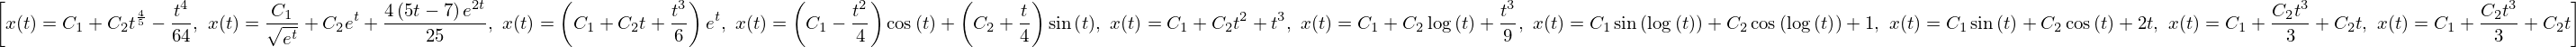

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import*
init_printing(use_unicode=True)
t = symbols('t')
x = Function('x')
#dsolve(x(t).diff(t,t) + x(t)*(x(t).diff(t))**3) #cant solve
#checkodesol(eq, dsolve(eq)) 

[dsolve(5*x(t).diff(t,t) + x(t).diff(t)/t+t**2),
dsolve(2*x(t).diff(t,t) - x(t).diff(t) - x(t) - 4*t*exp(2*t)), #realiuju saknu atvejis
dsolve(x(t).diff(t,t) - 2*x(t).diff(t) + x(t) - t*exp(t)), #kartotiniu saknu atvejis
dsolve(x(t).diff(t,t) + x(t) - t*sin(t)), #kompleksiniu saknu atvejis
dsolve(t**2*x(t).diff(t,t) -t*x(t).diff(t) - 3*t**3), #kintamuju koeficientu atvejis
dsolve(t*x(t).diff(t,t) + x(t).diff(t) - t**2),
dsolve(t**2*x(t).diff(t,t) + t*x(t).diff(t) +x(t)-1), #Eulerio lygtis
dsolve(x(t).diff(t,t) + x(t)-2*t),
dsolve((t**2+1)*x(t).diff(t,t) -2*t*x(t).diff(t)),
dsolve((t**2+1)*x(t).diff(t,t) - 2*t*x(t).diff(t))]

In [29]:
def brėžk_kreivę(expr, ics, fig=None, ax=None, xlim=[-3, 3], ylim=[-2, 4], step=0.01):
    if fig is None:
        fig = plt.figure(figsize=(12, 12))
    if ax is None:
        ax = fig.gca()
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    
    sol = spręsk(expr, ics)
    if sol is not None:
        func = np.vectorize(lambdify(t, sol.rhs, 'numpy'))
        X = np.arange(*xlim, step)
        try:
            ax.plot(X, func(X), label=str(ics)+': $'+latex(sol.rhs)+'$')
        except NameError:
            print(sol.rhs)
            print(f'np.arange({xlim[0]},{xlim[1]},{step})')
            
    return fig, ax

